# Cannabis legalization effects on hard drugs trafficking and usage
#### By Nardine Abu-Nassar and Arie Stoliarsky

---

# Data preprocessing
## Section 1: packages import


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

## Section 2: load the datasets

---

#### sub-sections:
2.1) Download files:  
    &emsp;2.1.1) From the [UNODC site](https://www.unodc.org/unodc/en/data-and-analysis/wdr2024-annex.html):  
    &emsp;&emsp;2.1.1.a) 7.1._Drug_seizures_2018-2022.xlsx  
    &emsp;&emsp;2.1.1.b) 10.1._Drug_related_crimes.xlsx  
    &emsp;2.1.2) From Kaggle download the [legalization status dataset](https://www.kaggle.com/datasets/venusrosario/legality-of-cannabis/)  

2.2) Change the names for our ease of use:  
    &emsp;2.2.1) 7.1._Drug_seizures_2018-2022.xlsx --> unodc_drug_seizures.xlsx  
    &emsp;2.2.2) 10.1._Drug_related_crimes.xlsx --> unodc_drug_crime_counts.xlsx  
    &emsp;2.2.3) Legality_of_cannabis.csv --> legalization.csv  
    
2.3) Manual feature engineering - further explanation in [section 3](#section-3-manual-feature-engineering-for-legalizationcsv) 

2.4) Load data into pandas Dataframes


In [2]:
# Defining constants
data_path = Path(f"{os.getcwd()}\\data\\")

# rename files
if os.path.isfile(data_path.joinpath('7.1._Drug_seizures_2018-2022.xlsx')):
    os.rename(data_path.joinpath('7.1._Drug_seizures_2018-2022.xlsx'), data_path.joinpath('unodc_drug_seizures.xlsx'))
if os.path.isfile(data_path.joinpath('10.1._Drug_related_crimes.xlsx')):
    os.rename(data_path.joinpath('10.1._Drug_related_crimes.xlsx'), data_path.joinpath('unodc_drug_crime_counts.xlsx'))
if os.path.isfile(data_path.joinpath('Legality_of_cannabis.csv')):
    os.rename(data_path.joinpath('Legality_of_cannabis.csv'), data_path.joinpath('legalization.csv'))


In [3]:
# load into pandas DataFrame:
seizures_df = pd.read_excel(data_path.joinpath('unodc_drug_seizures.xlsx'), header=1, engine='calamine')
seizures_df.head()

,Region,SubRegion,Country,DrugGroup,DrugSubGroup,DrugName,Reference year,Kilograms,msCode
0,Africa,East Africa,Kenya,Amphetamine-type stimulants (excluding “ecstasy”),Methamphetamine,Methamphetamine,2022,10.84,KEN
1,Africa,East Africa,Kenya,Cannabis-type drugs (excluding synthetic canna...,Cannabis herb (marijuana),Cannabis herb (marijuana),2022,8474.41,KEN
2,Africa,East Africa,Kenya,Cannabis-type drugs (excluding synthetic canna...,Cannabis plants,Cannabis plants,2022,2534.40,KEN
3,Africa,East Africa,Kenya,Cocaine-type,Cocaine,Cocaine hydrochloride,2022,10.99,KEN
4,Africa,East Africa,Kenya,Opioids,Opiates,Heroin,2022,38.94,KEN


In [4]:
crime_counts_df = pd.read_excel(data_path.joinpath('unodc_drug_crime_counts.xlsx'), engine='calamine')
crime_counts_df.head()

,Region,SubRegion,Country,campaign,Year,Type of offence,Drug,Calculated total,Reported total,Males,Females,Adults,Juveniles,Unknown/Other/ Third/Intersex,Specify year if other,Adults: 18 and older,Juveniles: under 18 years old,msCode
0,Africa,West and Central Africa,Ghana,ARQ2021,2021,Other drug-related offences,Any Illicit drugs,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Yes,Yes,GHA
1,Europe,Western and Central Europe,Gibraltar,ARQ2021,2021,Other drug-related offences,Any Illicit drugs,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,GIB
2,Asia,East and South-East Asia,"China, Macao SAR",ARQ2021,2021,Other drug-related offences,Any Illicit drugs,0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Yes,Yes,MAC
3,Americas,South America,Venezuela (Bolivarian Republic of),ARQ2022,2022,Other drug-related offences,Any Illicit drugs,0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,Yes,Yes,VEN
4,Africa,North Africa,Algeria,HIST2018,2018,Offences related to drug trafficking,Other opioids not under international control,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Yes,DZA


In [5]:
legalization_df = pd.read_csv(data_path.joinpath('legalization.csv'), encoding='utf-16')
legalization_df.head()

,Country/Territory,Recreational,Recreational_year,Medical,Mediacal_year,Decriminalized_max_possession,Notes
0,Afghanistan,Illegal,NaN,Illegal,NaN,NaN,Production banned by King Zahir Shah in 1973.
1,Albania,Illegal,NaN,Illegal,NaN,NaN,Prohibited but plants highly available through...
2,Algeria,Illegal,NaN,Illegal,NaN,NaN,NaN
3,Andorra,Illegal,NaN,Illegal,NaN,NaN,NaN
4,Angola,Illegal,NaN,Illegal,NaN,NaN,NaN


---

## Section 3: Manual feature engineering for legalization.csv

There was crucial information missing - the years when legislation had changed.  
Therefore, using the **Notes** column, which contains diverse information, including years when countries changed legislation.  
Additionally, it contains data about the maximum amount of cannabis that a citizen can have on his possession without receiving a penalty (in grams).  

As such, we manually had created three new columns - _Recriational_year_ (integer) and _Medical_year_ (integer) which indicate the year the legislation  
was enacted in, according to of our category, and _Decriminalized_max_possession_ (float) that indicates the maximum amount of possession of cannabis  
on a person is allowed in a country (in grams).    

#### 

---

## Section 4: Initial analysis of each dataframe

### sub-section 4.1: _unodc_seizures_

#### Key features:

- Region (as a way to aggregate countries)
- Country (as a key to merge between datasets, and as the most basic geographical entity)
- DrugGroup (mainly used to merge this dataset with the drug_crime dataset)
- DrugSubGroup (as an indicator of the drug type)
- Reference Year (for the timeseries analysis)
- Kilograms (our target variable)

Accordingly - the following features will be dismissed:
- SubRegion (less known than continent, and region is a good enough aggregate)
- DrugName (too specific, making the number of categories too large - see figure 4.1.1)
- msCode (another way of writing the country's name)

#### 4.1.1 - drug type categorization (_DrugName_, _DrugGroup_, _DrugSubGroup_ variables)

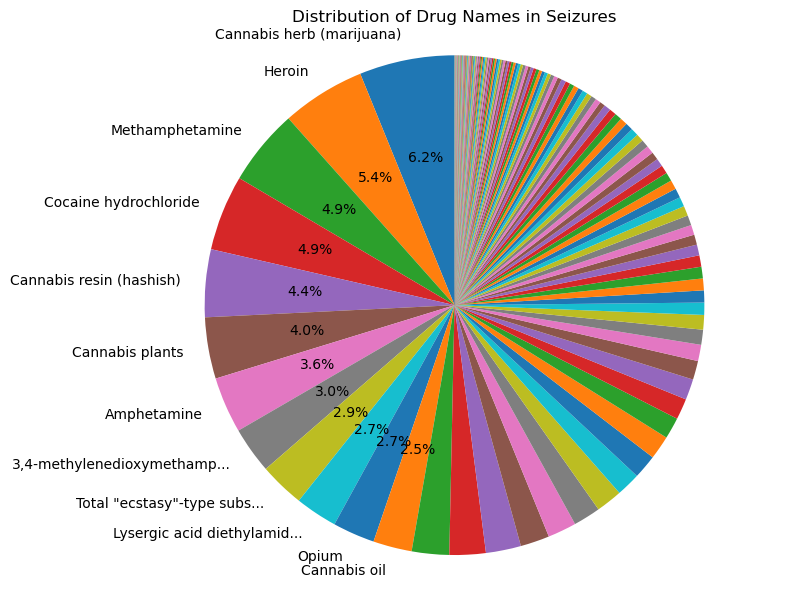

In [23]:
# extract the drug names and their counts
drugNames = seizures_df["DrugName"].value_counts()

# Calculate percentages
total = drugNames.sum()
percentages = 100 * drugNames / total

# Create shortened labels
MAX_LABEL_LENGTH = 25
labels = []
for drug_name, pct in zip(drugNames.index, percentages):
    if pct >= 2.5:  # Only show labels for segments ≥ 2.5%
        # Truncate long labels
        if len(drug_name) > MAX_LABEL_LENGTH:
            labels.append(drug_name[:MAX_LABEL_LENGTH] + "...")
        else:
            labels.append(drug_name)
    else:
        labels.append('')  # Empty string for small segments

# Create a figure
plt.figure(figsize=(8, 6))

# Create pie chart with truncated labels
plt.pie(drugNames.values, 
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%' if pct >= 2.5 else '',
        startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Add title
plt.title('Distribution of Drug Names in Seizures')

# Show plot
plt.tight_layout()
plt.show()


As it can be seen in the pie-chart above, the distribution of drug types is almost uniform, and contains a large variety of values. Thus, making this variable less informative that its higher-level counterpart _DrugSubGroup_ a more viable candidate than it.

On the other hand, as it could be observed below, using only _DrugGroup_ is too general, for example - it aggregates different types of cannabis type drugs together, some of them don't apply under the legalization status in most cases (i.e. Hashish). Therefore, making _DrugSubGroup_ an essential variable for indicating the drug type category.

To handle the removal of this feature, we are going to aggregate _Kilograms_ by summing it for all _DrugNames_.

#### 4.1.2: Selecting sub-group of hard drugs to use in our study

This is going to be achieved by counting for each _DrugGroup_ the amount of instances in our dataset

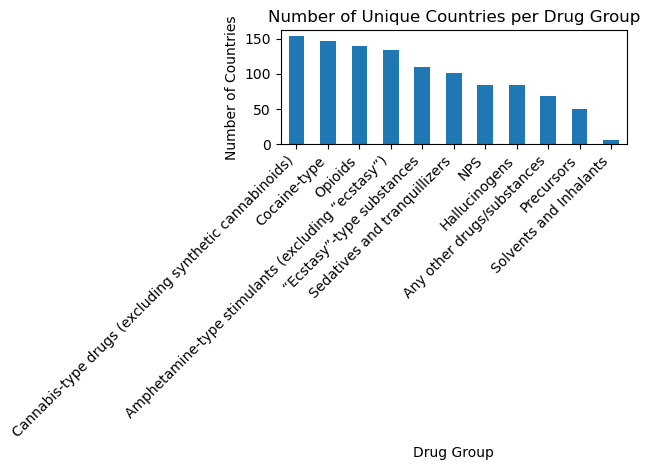

In [19]:
# Count unique countries per drug group
country_counts = seizures_df.groupby('DrugGroup')['Country'].nunique().sort_values(ascending=False)

# Plot the bar chart
plt.figure()
country_counts.plot(kind='bar')
plt.xlabel('Drug Group')
plt.ylabel('Number of Countries')
plt.title('Number of Unique Countries per Drug Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the bar-plot above, we can see that except cannabis-type, which are considered _light_ drugs, all other types between Cocaine and Hallucinogens will be considered in out case (with one exception).

The following drugs are dismissed:
- _Any other drugs/substances_: It is too general, and we cannot determine whether these substances are considered hard drugs.
- _Percursors_ and _Solvents and Inhalants_: There is more than half the countries which don't gather data on these, and the countries that do gather data on them are insignificant to our analysis.
- _NPS_: This category consists of the drugs listed below. As it can be seen, it comprised of various types of drugs like synthetic cannabinoids, mushrooms and Ketamine, all from seemingly different categories (mushrooms are hallucinogens, Khat is as light as cannabis or even close to tobacco, etc.). This makes these values not reliable. 

In [21]:
nps = seizures_df[seizures_df["DrugGroup"] == "NPS"]["DrugName"].value_counts()
nps

DrugName
Ketamine and phencyclidine-type substances    194
Khat                                          104
Synthetic cathinones                           51
Synthetic cannabinoids (“Spice”)               49
Mushrooms (hallucinogenic)                     38
Kratom (Mitragyna speciosa)                    37
Synthetic cannabinoids (Spice)                 29
Non-specified NPS                              13
Alpha-Pyrrolidinohexiophenone (alpha-PHP)      12
Phenethylamines                                12
2C (psychedelics)                               9
Salvia divinorum                                9
Piperazines                                     8
MDMB-CHMICA                                     7
Ayahuasca                                       7
Tryptamines                                     6
JWH-210                                         6
4-Fluoromethamphetamine (4-FMA)                 5
2,5-Dimethoxy-4-chloroamphetamine (DOC)         4
Pentedrone                               

In [24]:
# Handling aggregation of the DrugName variable and removal of irrelevant DrugGroups:
seizures_df[['Region', 'Country', 'DrugGroup', 'DrugSubGroup', 'Kilograms']].groupby(['Region', 'Country', 'DrugGroup', 'DrugSubGroup']).agg('sum')

Region  \
Country     DrugGroup                                              DrugSubGroup                                      
Afghanistan Amphetamine-type stimulants (excluding “ecstasy”)      Methamphetamine            AsiaAsiaAsiaAsiaAsia   
                                                                   Prescription stimulants                    Asia   
            Any other drugs/substances                             Other miscellaneous            AsiaAsiaAsiaAsia   
            Cannabis-type drugs (excluding synthetic cannabinoids) Cannabis herb (marijuana)              AsiaAsia   
                                                                   Cannabis resin (hashish)   AsiaAsiaAsiaAsiaAsia   
...                                                                                                            ...   
Zimbabwe    Cannabis-type drugs (excluding synthetic cannabinoids) Cannabis plants                          Africa   
            Cocaine-type                                           Cocaine                                  Africa   
            Opioids                                                Pharmaceutical opioids                   Africa   
            Sedatives and tranquillizers                           Benzodiazepines                          Africa   
            “Ecstasy”-type substances                              “Ecstasy”-type substances                Africa   

                                                                                                                                                                                                                                                                              SubRegion  \
Country     DrugGroup                                              DrugSubGroup                                                                                                                                                                                                           
Afghanistan Amphetamine-type stimulants (excluding “ecstasy”)      Methamphetamine            Near and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West Asia   
                                                                   Prescription stimulants                                                                                                                                                        Near and Middle East/ South-West Asia   
            Any other drugs/substances                             Other miscellaneous                                             Near and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West Asia   
            Cannabis-type drugs (excluding synthetic cannabinoids) Cannabis herb (marijuana)                                                                                                                 Near and Middle East/ South-West AsiaNear and Middle East/ South-West Asia   
                                                                   Cannabis resin (hashish)   Near and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West AsiaNear and Middle East/ South-West Asia   
...                                                                                                                                                                                                                                                                                 ...   
Zimbabwe    Cannabis-type drugs (excluding synthetic cannabinoids) Cannabis plants                                                                                                                                                                                      Southern Africa   
            Cocaine-type  

---

#### 4.1.3 - Exploring _Kilograms_ - Our target variable

_Kilograms_ indicates the total amount of drugs (of some type) that has been seized at one country over one year (in kilograms). Below is the distribution of Seized kilograms of drugs by continent and by drug_group: 